<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Predict house prices with regression algorithms and sklearn**


Note: This project builds upon the [Learn regression algorithms using Python and scikit-learn](https://developer.ibm.com/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/) tutorial on [IBM Developer](https://developer.ibm.com/), authored by Samaya Madhavan and Mark Sturdevant.

Estimated time needed: **30** minutes


## Background


Imagine that you are a data scientist at a real estate company. Your task is to develop a model that predicts home prices based on various features like location, size, number of bedrooms, age of the house, and proximity to amenities. The company relies on these predictions to advise clients on the best times to buy or sell their properties, optimize their investment returns, and understand market trends. Using Python and scikit-learn, you'll employ regression algorithms to analyze historical data and build an accurate predictive model.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/TgOYfDiaa6VSkS5Q4g1LbQ/house.png" width="50%" />


Regression is the process of predicting a dependent variable that contains continuous values by analyzing the relationship between independent variables. Several algorithms help you uncover these relationships to improve the accuracy of your predictions.

This notebook guides you through the steps of data preparation, model selection, training, and evaluation using scikit-learn to predict values. Scikit-learn provides implementations of many regression algorithms. In this guided project, you conduct a comparative study of five different regression algorithms.

To help visualize your process, you use 2D and 3D charts to show how the classes look (with three selected dimensions) using the Matplotlib and seaborn Python libraries.


## **Table of contents**

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Setup](#Setup)
    1. [Installing required libraries](#Installing-required-libraries)
    2. [Importing required libraries](#Importing-required-libraries)
    3. [Defining helper functions](#Defining-helper-functions)
    4. [Load the data](#Load-the-data)
    5. [Data exploration](#Data-exploration)
    6. [Data preparation](#Data-preparation)
4. [Regression models](#Regression-models)
    1. [Simple linear regression](#Simple-linear-regression)
    2. [Multiple linear regression model](#Multiple-linear-regression-model)
    3. [Polynomial linear regression model](#Polynomial-linear-regression-model)
    4. [Decision tree regressor](#Decision-tree-regressor)
    5. [Random forest regressor](#Random-forest-regressor)
    6. [Comparative study of different regression algorithms](#Comparative-study-of-different-regression-algorithms)
5. [Exercises](#Exercises)
    1. [Exercise 1 - Use one-hot encoding to encode the categorical columns and the Standard Scaler to scale the numerical data](#Exercise-1---Use-One-Hot-encoding-to-encode-the-categorical-columns-and-the-Standard-Scaler-to-scale-the-numerical-data)
    2. [Exercise 2 - Prepare data frame for splitting data into train and test data sets](#Exercise-2---Prepare-data-frame-for-splitting-data-into-train-and-test-datasets)
    3. [Exercise 3 - Find the intercept and the coefficients for a multiple linear regression model](#Exercise-3---Find-the-Intercept-and-the-Coefficients-for-a-Multiple-Linear-Regression-model)


## Objectives

After completing this lab, you are able to:

- **Understand regression analysis basics**: Learn core concepts and applications of regression in data prediction.
- **Implement regression models**: Use Python and scikit-learn to develop various regression models.
- **Master data preparation**: Acquire skills in cleaning and preparing data for regression analysis.
- **Evaluate model performance**: Learn to use metrics like MSE and R-squared to assess model accuracy.
- **Apply regression to real estate**: Demonstrate how regression predicts real estate prices, aiding investment decisions.


----


## Setup


For this lab, you use the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data
*   [`Matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine learning pipeline-related functions.


### Installing required libraries

The following required libraries are not pre-installed in the Skills Network Labs environment. You must run the following cell to install them.

Note: We are specifying the library versions here to ensure compatibility. We recommend that you do the same because, even though the libraries will be updated in the future, these versions will still support this lab work.


In [2]:
!pip install pandas==2.2.2
!pip install matplotlib==3.8.4
!pip install seaborn==0.13.2
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 147.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 144.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 161.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 145.6 MB/s eta 0:00:0000:01


After you have installed the libraries, please **restart your kernel**. You can do that by navigating to the button, as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/build-a-hotdog-not-hotdog-classifier-guided-project/images/Restarting_the_Kernel.png" width="50%" alt="Restart kernel">


### Importing required libraries


In [4]:
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

### Defining helper functions

Define some functions that will be used repeatedly for visualization.


In [5]:
def two_d_compare(X_test, y_test, y_pred, model_name):
    plt.subplots(ncols=2, figsize=(10, 4))
    plt.suptitle('Actual vs Predicted data : ' + model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()


def model_metrics(regressor, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("Root mean squared error: %.2f" % math.sqrt(mse))
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2)
    return [mse, r2]
    

def two_vs_three(x_test,y_test,y_pred,z=None, isLinear = False):
    area = 60

    fig = plt.figure(figsize=(6,6))
    fig.suptitle('view of sales price data')

    # First subplot
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.scatter(x_test, y_pred, alpha=0.5,color='red', s= area)
#     ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('YEARBUILT')
    ax.set_ylabel('SELLING PRICE')
    
    plt.title('YEARBUILT vs SALEPRICE')

    plt.show()
    

### Load data


In the following snippet, you use the pandas library to load a .csv file that contains housing-related information. With several independent variables related to this domain, you are going to predict the sales price of a house. 

This data set is from [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) and explores the regression techniques with house prices data.


In [6]:
df_pd =  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/O9xijcDVZM-5MCjMyPtxwQ/house-price.csv")
df_pd.head()

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [7]:
df_pd.columns

Index(['ID', 'LOTAREA', 'BLDGTYPE', 'HOUSESTYLE', 'OVERALLCOND', 'YEARBUILT',
       'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION', 'BSMTCOND', 'HEATING',
       'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'KITCHENQUAL', 'TOTRMSABVGRD',
       'FIREPLACES', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGECARS',
       'GARAGECOND', 'POOLAREA', 'POOLQC', 'FENCE', 'MOSOLD', 'YRSOLD',
       'SALEPRICE'],
      dtype='object')

### Data exploration


Before you explore any models, let's get to know the data set better. In this section, you'll a quick look at the columns in the data set and examine how the sale price varies depending on the year the house was built. Additionally, you'll check for any missing values.


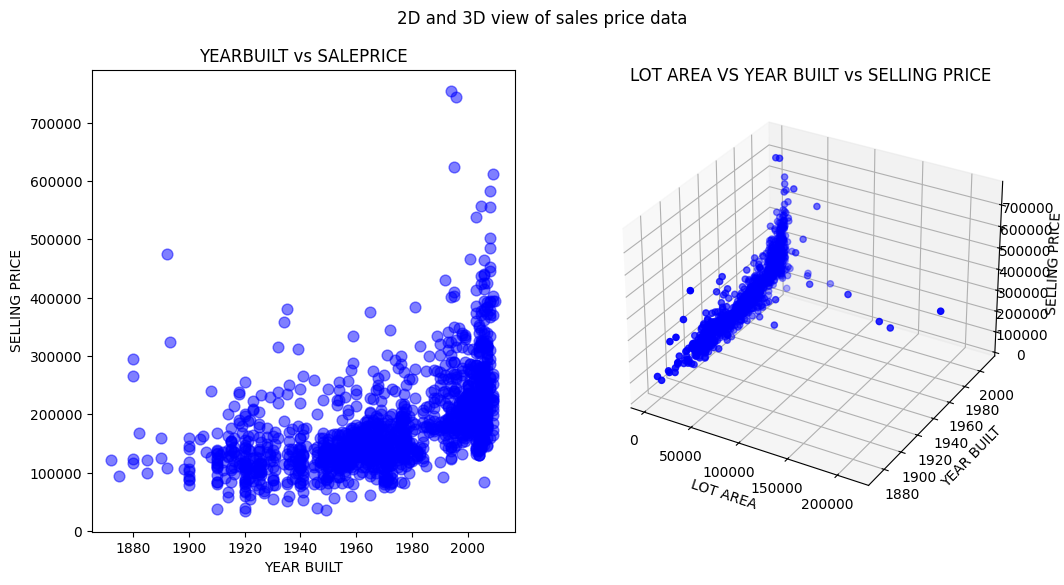

In [8]:
area = 60
x = df_pd['YEARBUILT']
y = df_pd['SALEPRICE']
z = df_pd['LOTAREA']


fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of sales price data')

# First subplot
ax = fig.add_subplot(1, 2, 1)

ax.scatter(x, y, alpha=0.5,color='blue', s=area)
ax.set_xlabel('YEAR BUILT')
ax.set_ylabel('SELLING PRICE')

plt.title('YEARBUILT vs SALEPRICE')

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, color='blue', marker='o')

ax.set_ylabel('YEAR BUILT')
ax.set_zlabel('SELLING PRICE')
ax.set_xlabel('LOT AREA')

plt.title('LOT AREA VS YEAR BUILT vs SELLING PRICE')

plt.show()

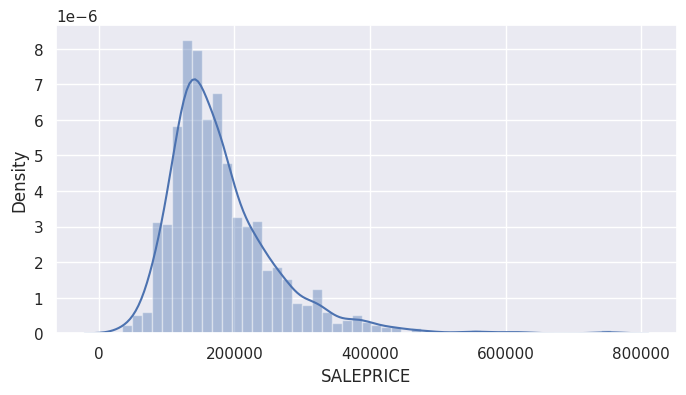

In [9]:
sns.set(rc={"figure.figsize": (8, 4)})
np.random.seed(0)
ax = sns.distplot(df_pd['SALEPRICE'])
plt.show()

This distribution looks like a log-normal distribution. Instead of using the house sale price as the outcome/target, you use the log(SALEPRICE). Note that some regression algorithms perform better when the variable is normally distributed (this is true for linear regression, but has no effect on tree-based algorithms like XGBoost or random forest).


In [10]:
print("The dataset contains columns of the following data types : \n" +str(df_pd.dtypes))

The dataset contains columns of the following data types : 
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


Notice that FIREPLACEQU, GARAGETYPE, GARAGEFINISH, GARAGECOND, FENCE, and POOLQC have missing values. 


In [11]:
print("The dataset contains following number of records for each of the columns : \n" +str(df_pd.count()))

The dataset contains following number of records for each of the columns : 
ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64


In [12]:
df_pd.isnull().any()

ID              False
LOTAREA         False
BLDGTYPE        False
HOUSESTYLE      False
OVERALLCOND     False
YEARBUILT       False
ROOFSTYLE       False
EXTERCOND       False
FOUNDATION      False
BSMTCOND         True
HEATING         False
HEATINGQC       False
CENTRALAIR      False
ELECTRICAL       True
FULLBATH        False
HALFBATH        False
BEDROOMABVGR    False
KITCHENABVGR    False
KITCHENQUAL     False
TOTRMSABVGRD    False
FIREPLACES      False
FIREPLACEQU      True
GARAGETYPE       True
GARAGEFINISH     True
GARAGECARS      False
GARAGECOND       True
POOLAREA        False
POOLQC           True
FENCE            True
MOSOLD          False
YRSOLD          False
SALEPRICE       False
dtype: bool

### Data preparation


Data preparation is a crucial step in machine learning model building because a model can only perform well when it is trained on good and well-prepared data. Consequently, this step consumes the bulk of a data scientist's time spent building models.

During this process, you identify categorical columns in the data set. Categories must be indexed, meaning that the string labels must be converted to numerical label indices. These label indices are then encoded using one-hot encoding into a binary vector, with at most a single one-value indicating the presence of a specific feature value among the set of all feature values. This encoding allows algorithms that expect continuous features to utilize categorical features effectively.


In [13]:
#remove columns that are not required
df_pd = df_pd.drop(['ID'], axis=1)

df_pd.head()

,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,GasA,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


Notice that some categorical variables have null values. You'll handle those missing values by replacing the missing values with the most frequent value. This is done with the `SimpleImputer` function with `strategy="most_frequent"`.

In this step, you also define `categorical_transformer` as a pipeline to deal with missing data and encode categorical data. Using pipelines in machine learning ensures a reproducible workflow by automating the sequence of data preprocessing. Later in this project, there are many instances where you must encode and scale data when training the different models. Having a `Pipeline` lets you reproduce these tasks multiple times while keeping it simple.


In [14]:
# Defining the categorical columns

categoricalColumns = df_pd.select_dtypes(include=['object']).columns

print("Categorical columns: ")
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy='most_frequent')
onehot_categorical = OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute', impute_categorical),
                                          ('onehot', onehot_categorical)])

Categorical columns: 
Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')


For numerical columns, you scale them using the `StandardScaler`. Scaling data helps to improve algorithm performance and speed. It prevents features with larger ranges from dominating and ensures stable, reliable results.

Like the `categorical_transformer` pipeline, you'll define a pipeline `numerical_transformer` that scales numerical columns.


In [15]:
# Defining the numerical columns 
numericalColumns = [col for col in df_pd.select_dtypes(include=['float', 'int']).columns if col not in ['SALEPRICE']]
print("Numerical columns: ")
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns: 
['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD']


The following code allows you to apply processing steps to columns in the data set for both categorical and numerical columns with pipelines defined previously. 


In [16]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),
                                                            ('num',numerical_transformer,numericalColumns)],
                                              remainder="passthrough")

The transformation happens in the pipeline. This is temporarily done here to show what the intermediate value looks like.


In [17]:
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp)

df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.00800e+03
  2.08500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.00700e+03
  1.81500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.00800e+03
  2.23500e+05]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.01000e+03
  2.66500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 2.01000e+03
  1.42125e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 2.00800e+03
  1.47500e+05]]
Data after transforming :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59911110e+00
   1.38777489e-01  2.08500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
  -6.14438622e-01  1.81500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.90891347e-01
   1.38777489e-01  2.23500000e+05]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
   1.64520971e+00  2.66500000e+05]
 [ 1.00000000e+00  0.00000000e+

In [18]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df_pd.drop(['SALEPRICE'], axis=1)

label = pd.DataFrame(df_pd, columns=['SALEPRICE'])
label = np.log(df_pd['SALEPRICE'])

print("value of label: \n" + str(label))

value of label: 
0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SALEPRICE, Length: 1460, dtype: float64


## Regression models


### Simple linear regression

This is the most basic form of linear regression in which the variable to be predicted is dependent on only one other variable. This is calculated by using the formula that is generally used in calculating the slope of a line.

$$
y = w_0 + w_1 \times x_1
$$

In the previous equation, $y$ refers to the target variable and $x_1$ refers to the independent variable. $w_1$ refers to the coefficient that expresses the relationship between $y$ and $x_1$ and is also know as the slope. $w_0$ is the constant coefficient, that is, the intercept. It refers to the constant offset that $y$ will always be with respect to the independent variables.


Because simple linear regression assumes that output depends on only one variable, you are assuming that it depends on the YEARBUILT. Data is split into training and test sets. 


In [19]:
X = features['YEARBUILT'].values.reshape(-1,1)
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X, label, random_state=0)

print("Dimensions of datasets that will be used for training: Input features"
      + str(X_train_slr.shape)
      + ". Output label" + str(y_train_slr.shape))
print("Dimensions of datasets that will be used for testing: Input features"
      + str(X_test_slr.shape)
      + ". Output label"
      + str(y_test_slr.shape))

Dimensions of datasets that will be used for training: Input features(1095, 1). Output label(1095,)
Dimensions of datasets that will be used for testing: Input features(365, 1). Output label(365,)


In [20]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

slRegressor = LinearRegression()

slRegressor.fit(X_train_slr, y_train_slr)

y_pred_slr = slRegressor.predict(X_test_slr)

print(slRegressor)

LinearRegression()


In [21]:
print('Intercept: \n',slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 -3.3916251243597006
Coefficients: 
 [0.00782031]


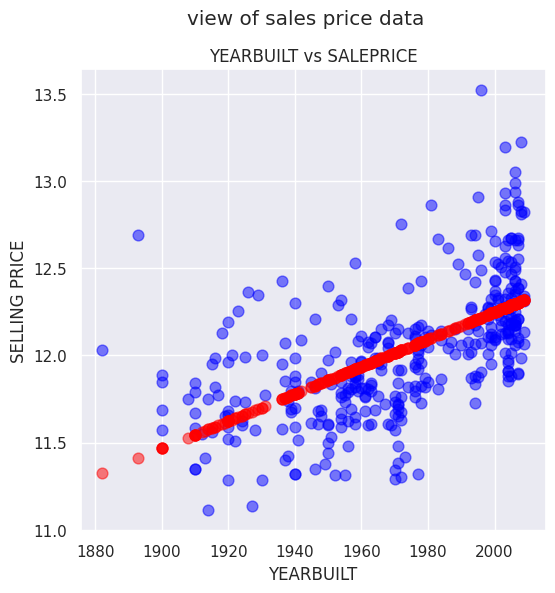

In [22]:
two_vs_three(X_test_slr[:, 0], y_test_slr, y_pred_slr, None, True)

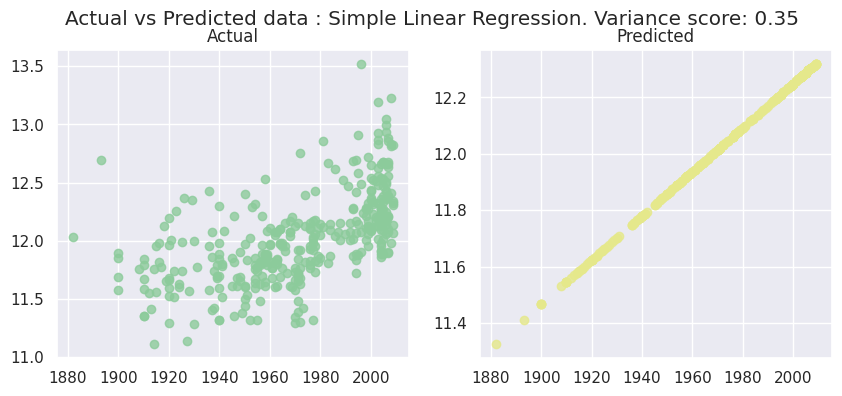

In [23]:
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)

In [25]:
slrMetrics = model_metrics(slRegressor, y_test_slr, y_pred_slr)

Root mean squared error: 0.31
R2 score: 0.35


### Multiple linear regression model

Multiple linear regression is an extension to the simple linear regression. In this setup, the target value is dependant on more than one variable. The number of variables depends on the use case at hand. Usually, a subject matter expert is involved in identifying the fields that contribute towards a better predicting the output feature.

$$
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
$$


Because multiple linear regression assumes that output depends on more than one variable, you are assuming that it depends on all of the 30 features. Data is split into training and test sets. As an experiment, you can try to remove a few features and check whether the model performs any better. 


In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) + 
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) + 
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30). Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30). Output label(365,)


In [27]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', mlRegressor)])

mlr_model.fit(X_train, y_train)

y_pred_mlr = mlr_model.predict(X_test)

print(mlRegressor)

LinearRegression()


In [28]:
print('Intercept: \n', mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)

Intercept: 
 830598449868.8376
Coefficients: 
 [ 1.95642527e+08  1.95642527e+08  1.95642527e+08  1.95642527e+08
  1.95642527e+08 -8.72775017e+11 -8.72775017e+11 -8.72775017e+11
 -8.72775017e+11 -8.72775017e+11 -8.72775017e+11 -8.72775017e+11
 -8.72775017e+11  7.20451082e+11  7.20451082e+11  7.20451082e+11
  7.20451082e+11  7.20451082e+11  7.20451082e+11 -1.16314438e+11
 -1.16314438e+11 -1.16314438e+11 -1.16314438e+11 -1.16314438e+11
  1.38675266e+12  1.38675266e+12  1.38675266e+12  1.38675266e+12
  1.38675266e+12  1.38675266e+12  3.84268101e+11  3.84268101e+11
  3.84268101e+11  3.84268101e+11  1.29871225e+11  1.29871225e+11
  1.29871225e+11  1.29871225e+11  1.29871225e+11  1.29871225e+11
 -4.13111412e+11 -4.13111412e+11 -4.13111412e+11 -4.13111412e+11
 -4.13111412e+11 -8.71977232e+11 -8.71977232e+11  3.15671046e+11
  3.15671046e+11  3.15671046e+11  3.15671046e+11  3.15671046e+11
 -1.00297871e+12 -1.00297871e+12 -1.00297871e+12 -1.00297871e+12
 -3.66423615e+10 -3.66423615e+10 -3.6642361

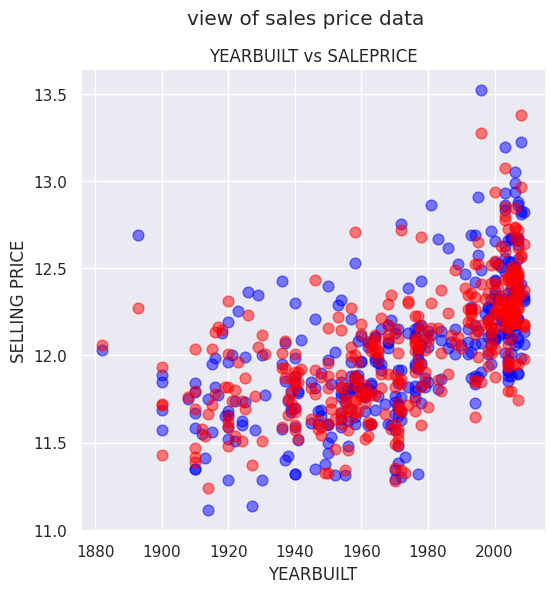

In [29]:
two_vs_three(X_test['YEARBUILT'],y_test,y_pred_mlr,X_test['LOTAREA'], True)

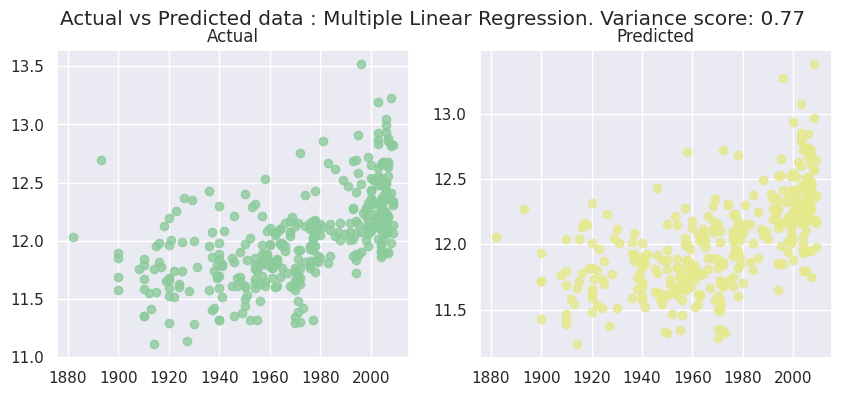

In [30]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_mlr, model_name)

In [31]:
mlrMetrics = model_metrics(slRegressor, y_test, y_pred_mlr)

Root mean squared error: 0.18
R2 score: 0.77


### Decision tree regressor

A decision tree-based model builds a set of rules from the training data to be able to predict the outcome. For the sake of understanding, this algorithm is compared to trees formed through decisions. The model contains branches that represent the rules that lead to the path of the outcome, that is, the leaf. Each prediction path leads to a leaf that contains multiple values. The same principle is applied to classification-type problems as well. For regression-type problems, the final prediction is usually the average of all of the values contained in the leaf it falls under.


In [32]:
X_train, X_test, y_train, y_test = train_test_split(features,np.log(df_pd['SALEPRICE']) , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30). Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30). Output label(365,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_name = "Decision Tree Regressor"

decisionTreeRegressor = DecisionTreeRegressor(random_state=0, max_features=30)

dtr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', decisionTreeRegressor)])

dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_test)

print(decisionTreeRegressor)

In [ ]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_dtr, model_name)

In [ ]:
dtrMetrics = model_metrics(decisionTreeRegressor, y_test, y_pred_dtr)

### Random forest regressor


Decision tree algorithms are efficient in eliminating columns that don't add value in predicting the output and in some cases, you are even able to see how a prediction was derived by backtracking the tree. However, this algorithm doesn't perform individually when the trees are huge and are hard to interpret. Such models are often referred to as weak models. However, the model performance is improvised by taking an average of several such decision trees derived from the subsets of the training data. This approach is called the random forest regression.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', randomForestRegressor)])

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

In [ ]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_rfr, model_name)

In [ ]:
rfrMetrics = model_metrics(randomForestRegressor, y_test, y_pred_rfr)

### Comparative study of different regression algorithms

In the following bar chart, you have compared the performances of different regression algorithms with each other. 

Mean squared error (MSE) and R2 are some of the popular metrics that are used to compare different regression algorithms.

MSE is calculated by getting the mean of the squared error. Here, error refers to the distance between an actual and predicted value. The closer the MSE is to 0, the better the model performance is. However, you are using the root of the MSE here so that it is more easily interpreted (units are in dollars instead of being in dollars-squared).


In [ ]:
n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8


area = 60
plt.subplots(ncols=2, figsize=(12, 9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, slrMetrics[0], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[0], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')


rects4 = plt.bar(index + bar_width*2, dtrMetrics[0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')


rects6 = plt.bar(index + bar_width*3, rfrMetrics[0], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('Root MSE')
plt.title('Mean Square Error comparison.')

plt.subplot(122)

rects1 = plt.bar(index, slrMetrics[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[1], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width*2, dtrMetrics[1], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')


rects6 = plt.bar(index + bar_width*3, rfrMetrics[1], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))

plt.legend()
plt.show()

# Exercises


We have prepared another sample data.


In [ ]:
car_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/exN-VGWhy9OjnXIevpKh5g/cars.csv')
car_df.head()

In [ ]:
# Removing unnecessary columns
car_df = car_df.drop(['Car_ID'], axis=1)

### Exercise 1 - Use one-hot encoding to encode the categorical columns and the Standard Scaler to scale the numerical data


In [ ]:
# Your code here

<details>
    <summary>Click here for solution</summary>

```python
# Defining the categorical columns 
categoricalColumns = car_df.select_dtypes(include=['object']).columns

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

# Defining the numerical columns 
numericalColumns = [col for col in car_df.select_dtypes(include=['float','int']).columns if col not in ['Price']]
print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")
```

</details>


### Exercise 2 - Prepare data frame for splitting data into train and test data sets


In [ ]:
# Your code here

<details>
    <summary>Click here for solution</summary>

```python
# prepare data frame for splitting data into train and test datasets
features = []
features = car_df.drop(['Price'], axis=1)

label = pd.DataFrame(car_df, columns = ['Price']) 
label = car_df['Price']

X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=42)
```

</details>


### Exercise 3 - Find the intercept and the coefficients for a multiple linear regression model


In [ ]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

# Your code here

<details>
    <summary>Click here for solution</summary>

```python
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', mlRegressor)])

mlr_model.fit(X_train,y_train)

y_pred_mlr= mlr_model.predict(X_test)

print('Intercept: \n',mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)
mlrMetrics = model_metrics(mlRegressor,y_test,y_pred_mlr)
```

</details>


## Authors


[Kang Wang](https://author.skills.network/instructors/kang_wang)

Kang Wang is a Data Scientist in IBM. He is also a PhD Candidate in the University of Waterloo.


[Lucy Xu](https://author.skills.network/instructors/lucy_xu)


### Contributors


[Wojciech "Victor" Fulmyk](https://author.skills.network/instructors/wojciech_fulmyk)

[Ricky Shi](https://author.skills.network/instructors/ricky_shi?show=blogs&sort_by=name)


Copyright © 2024 IBM Corporation. All rights reserved.
